In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install yfinance
!pip install requests
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 20.7 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-c

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import time
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
!pip install webdriver-manager

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import requests
import sys
import traceback
from getpass import getpass
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.support import expected_conditions as EC

# Get Data

## Solana

In [5]:
solana_df = yf.download("SOL-USD", start="2021-01-01", end=datetime.today().strftime('%Y-%m-%d'))
solana_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,1.509775,1.859656,1.502038,1.842084,1.842084,25722549
2021-01-02,1.845586,1.989295,1.721482,1.799275,1.799275,31671064
2021-01-03,1.799902,2.364981,1.799902,2.161752,2.161752,55073422
2021-01-04,2.162412,2.485097,1.876342,2.485097,2.485097,59955405
2021-01-05,2.490982,2.502616,2.077742,2.157217,2.157217,50555207
...,...,...,...,...,...,...
2022-06-01,45.765129,45.946659,40.050350,40.269669,40.269669,1422647092
2022-06-02,40.255280,41.327866,38.360672,40.891346,40.891346,1554022054
2022-06-03,40.895752,41.433346,37.802719,38.259220,38.259220,1348656102


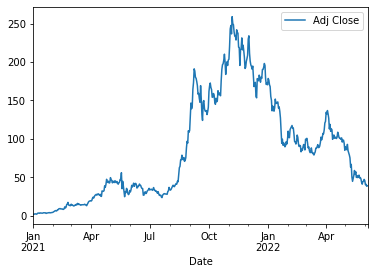

In [6]:
solana_df.plot(y = "Adj Close", use_index=True)

## Ethereum 

In [7]:
ethereum_df = yf.download("ETH-USD", start="2018-01-01", end=datetime.today().strftime('%Y-%m-%d'))
ethereum_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128
2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760
2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936
2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776
2018-01-05,975.750000,1075.390015,956.325012,997.719971,997.719971,6683149824
...,...,...,...,...,...,...
2022-06-01,1942.050659,1965.166626,1776.053223,1823.569336,1823.569336,21037797760
2022-06-02,1822.412109,1845.313965,1789.664185,1834.150513,1834.150513,17065041354
2022-06-03,1834.135010,1840.058838,1746.509766,1775.078613,1775.078613,14878001811


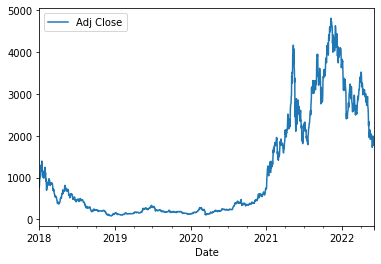

In [8]:
ethereum_df.plot(y = "Adj Close", use_index=True)

## Bitcoin

In [9]:
bitcoin_df = yf.download("BTC-USD", start="2018-01-01", end=datetime.today().strftime('%Y-%m-%d'))
bitcoin_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072
...,...,...,...,...,...,...
2022-06-01,31792.554688,31957.285156,29501.587891,29799.080078,29799.080078,41135817341
2022-06-02,29794.890625,30604.734375,29652.705078,30467.488281,30467.488281,29083562061
2022-06-03,30467.806641,30633.035156,29375.689453,29704.390625,29704.390625,26175547452


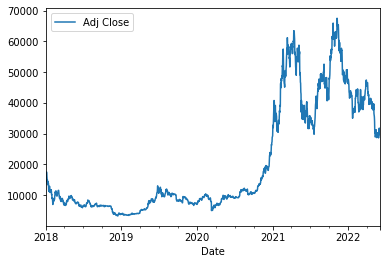

In [10]:
bitcoin_df.plot(y = "Adj Close", use_index=True)

In [11]:
bitcoin_df = bitcoin_df.reset_index()[['Date', 'Adj Close', 'Volume']]
bitcoin_df.rename(columns={"Date": "dates", "Adj Close" : "btc adj close", "Volume" : "btc volume"}, inplace = True)
bitcoin_df['dates'] = bitcoin_df['dates'].astype(str)

ethereum_df = ethereum_df.reset_index()[['Date', 'Adj Close', 'Volume']]
ethereum_df.rename(columns={"Date": "dates", "Adj Close" : "eth adj close", "Volume" : "eth volume"}, inplace = True)
ethereum_df['dates'] = ethereum_df['dates'].astype(str)

solana_df = solana_df.reset_index()[['Date', 'Adj Close', 'Volume']]
solana_df.rename(columns={"Date": "dates", "Adj Close" : "sol adj close", "Volume" : "sol volume"}, inplace = True)
solana_df['dates'] = solana_df['dates'].astype(str)

## Rarible

In [12]:
dict_collections = {}
list_broken_urls = []
url_top_100 = 'https://api-mainnet.rarible.com/marketplace/api/v4/collections/top?days=30&size=100'
url_collections = 'https://rarible-cdn.reallm.io/collections/{}/{}?filters=%7B%7D'
broken_collection_url = 'https://rarible.com/collection/{}/stats?range=-Number.MAX_SAFE_INTEGER'
list_features = ['marketcap', 'lowwatermark', 'transactions', 'owners', 'sellers', 'buyers']


def get_collections_id(url):
    json = requests.get(
        url
    ).json()

    df_id = pd.DataFrame.from_dict(json)
    df_id = df_id[['id', 'name']]
    return df_id


def change_collection_data(df, feature):
    if feature == 'prices':
        df.rename(columns = {'dates': 'dates'}, inplace = True)
    elif feature == 'marketcap':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'marketcap'}, inplace = True)
        df = df[['dates', 'marketcap']]
    elif feature == 'lowwatermark':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'lowwatermark'}, inplace = True)
        df = df[['dates', 'lowwatermark']]
    elif feature == 'transactions':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'amount_transactions'}, inplace = True)
        df = df[['dates', 'amount_transactions']]
    elif feature == 'owners':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'amount_owners'}, inplace = True)
        df = df[['dates', 'amount_owners']]
    elif feature == 'sellers':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'amount_sellers'}, inplace = True)
        df = df[['dates', 'amount_sellers']]
    elif feature == 'buyers':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'amount_buyers'}, inplace = True)
        df = df[['dates', 'amount_buyers']]
    
    return df


def get_collection_data(id, features):
    df = pd.read_json(url_collections.format(id, 'prices'))
    for feature in features:
        tmp = pd.read_json(url_collections.format(id, feature))
        df = df.merge(change_collection_data(tmp, feature), how='left', on='dates')
        
    return df


def add_stocks(df):
    df = df.merge(bitcoin_df, how='left', on='dates')
    df = df.merge(ethereum_df, how='left', on='dates')
    df = df.merge(solana_df, how='left', on='dates')
    
    return df


def replace_nan(df):
    for i in df.columns[df.isnull().any(axis=0)]:
        for index, value in df[i].items():
            if np.isnan(value):
                try:
                    df[i].at[index] = df[i].iloc[index-3: index].mean()
                except:
                    pass

    return df    


df_id = get_collections_id(url_top_100)
for index, row in df_id.iterrows():
    try:
        tmp = get_collection_data(row['id'], list_features)
        tmp = replace_nan(tmp)
        tmp = add_stocks(tmp)
        dict_collections[row['name']] = tmp
        print("collection:", row['name'], "done")
    except:
        print("collection:", row['name'], "has not got dataset")
        print("url:", broken_collection_url.format(row['id']))
        list_broken_urls.append(broken_collection_url.format(row['id']))
        pass


collection: Otherdeed done
collection: Azuki done
collection: Bored Ape Yacht Club done
collection: projectPXN done
collection: goblintown done
collection: MutantApeYachtClub done
collection: BEANZ Official done
collection: CloneX done
collection: Moonbirds done
collection: Doodles done
collection: Art Blocks Factory done
collection: Chimpers done
collection: Boki done
collection: Ragnarok done
collection: Genesis done
collection: DEGEN TOONZ done
collection: Murakami.Flowers done
collection: Mindblowon done
collection: AIMoonbirds done
collection: ENS domains has not got dataset
url: https://rarible.com/collection/0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85/stats?range=-Number.MAX_SAFE_INTEGER
collection: Rektguy done
collection: We Are All Going to Die done
collection: Moonbirds Oddities done
collection: adidas Originals: Into the Metaverse done
collection: Akumu Dragonz done
collection: BoredApeKennelClub done
collection: Meebits done
collection: Bored Ape Chemistry Club done
collect

In [13]:
with open('dataset.txt', 'w') as f:
    print(dict_collections, file=f)

In [14]:
dict_collections['MutantApeYachtClub']

,dates,prices_avg,prices_floor,prices_median,volume,marketcap,lowwatermark,amount_transactions,amount_owners,amount_sellers,amount_buyers,btc adj close,btc volume,eth adj close,eth volume,sol adj close,sol volume
0,2021-08-29,30573.945494,0.000000,25978.451172,1.706332e+08,9.277673e+03,21245.703,5581,7080.0,5.0,37.000000,48829.832031,25889650240,3227.002686,13296586731,94.469673,1830344091
1,2021-08-30,42150.432895,0.000000,32023.800781,4.611257e+07,3.916317e+06,20522.010,1094,7503.0,2.0,46.000000,47054.984375,31847007016,3224.374268,19306924485,110.544807,5274104165
2,2021-08-31,34728.502238,0.000000,28324.003906,1.972579e+07,7.019255e+06,20522.010,568,7693.0,3.0,24.000000,47166.687500,34730363427,3433.732666,27280502987,108.483772,7590894022
3,2021-09-01,34049.167712,1848.198730,24513.210938,1.637765e+07,2.655862e+07,20522.010,481,7793.0,6.0,42.000000,48847.027344,39139399125,3834.828125,30070890104,111.033005,3974443896
4,2021-09-02,26299.774417,12414.097656,22857.037109,1.041471e+07,1.794458e+08,20522.010,396,7933.0,9.0,21.000000,49327.722656,39508070319,3790.989990,24387397330,128.102386,5074399603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2022-05-31,36047.630534,32997.417969,35033.783203,4.325716e+05,6.114422e+08,24113.527,12,13977.0,93.0,1.004607,31792.310547,33538210634,1942.328003,18363115560,45.767841,1509191627
271,2022-06-01,35366.679766,1502.993530,35950.101562,6.012336e+05,2.785047e+07,24113.527,17,13989.0,114.0,1.004510,29799.080078,41135817341,1823.569336,21037797760,40.269669,1422647092
272,2022-06-02,36952.222982,32039.212891,38231.232422,2.217133e+05,5.936866e+08,24113.527,6,14007.0,108.0,1.004738,30467.488281,29083562061,1834.150513,17065041354,40.891346,1554022054
273,2022-06-03,34410.434570,25650.902344,34463.437500,4.817461e+05,4.753112e+08,24113.527,14,14017.0,52.0,1.004618,29704.390625,26175547452,1775.078613,14878001811,38.259220,1348656102


Testing models

In [15]:
from statsmodels.api import OLS
from sklearn.metrics import r2_score, mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
dict_collections["MutantApeYachtClub"].columns

Index(['dates', 'prices_avg', 'prices_floor', 'prices_median', 'volume',
       'marketcap', 'lowwatermark', 'amount_transactions', 'amount_owners',
       'amount_sellers', 'amount_buyers', 'btc adj close', 'btc volume',
       'eth adj close', 'eth volume', 'sol adj close', 'sol volume'],
      dtype='object')

In [17]:
X = dict_collections["MutantApeYachtClub"][["lowwatermark", "amount_transactions", "amount_owners", "amount_sellers", "amount_buyers"]]
X

,lowwatermark,amount_transactions,amount_owners,amount_sellers,amount_buyers
0,21245.703,5581,7080.0,5.0,37.000000
1,20522.010,1094,7503.0,2.0,46.000000
2,20522.010,568,7693.0,3.0,24.000000
3,20522.010,481,7793.0,6.0,42.000000
4,20522.010,396,7933.0,9.0,21.000000
...,...,...,...,...,...
270,24113.527,12,13977.0,93.0,1.004607
271,24113.527,17,13989.0,114.0,1.004510
272,24113.527,6,14007.0,108.0,1.004738
273,24113.527,14,14017.0,52.0,1.004618


In [18]:
y = dict_collections["MutantApeYachtClub"]["prices_avg"]
# X = dict_collections["MutantApeYachtClub"][["prices_avg", "volume"]]

# reg = LinearRegression().fit(X, y)
reg = OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             prices_avg   R-squared (uncentered):                   0.861
Model:                            OLS   Adj. R-squared (uncentered):              0.858
Method:                 Least Squares   F-statistic:                              333.6
Date:                Sun, 05 Jun 2022   Prob (F-statistic):                   2.61e-113
Time:                        13:34:43   Log-Likelihood:                         -3116.1
No. Observations:                 275   AIC:                                      6242.
Df Residuals:                     270   BIC:                                      6260.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
lowwatermark            1.1946      0.227      5.259      0.000       0.747       1.642
amount_transactions    -5.6683      3.703     -1.531      0.127     -12.959       1.623
amount_owners           2.4558      0.375      6.550      0.000       1.718       3.194
amount_sellers          4.2093      3.717      1.132      0.258      -3.108      11.527
amount_buyers         151.2796    106.109      1.426      0.155     -57.626     360.186
==============================================================================
Omnibus:                       39.217   Durbin-Watson:                   0.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.442
Skew:                           1.019   Prob(JB):                     6.75e-12
Kurtosis:                       3.579   Cond. No.                     1.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X = dict_collections["MutantApeYachtClub"][["amount_transactions", "amount_owners", "amount_sellers", "amount_buyers"]]
X

,amount_transactions,amount_owners,amount_sellers,amount_buyers
0,5581,7080.0,5.0,37.000000
1,1094,7503.0,2.0,46.000000
2,568,7693.0,3.0,24.000000
3,481,7793.0,6.0,42.000000
4,396,7933.0,9.0,21.000000
...,...,...,...,...
270,12,13977.0,93.0,1.004607
271,17,13989.0,114.0,1.004510
272,6,14007.0,108.0,1.004738
273,14,14017.0,52.0,1.004618


In [20]:
y = dict_collections["MutantApeYachtClub"]["prices_median"]
# X = dict_collections["MutantApeYachtClub"][["prices_avg", "volume"]]

# reg = LinearRegression().fit(X, y)
reg = OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          prices_median   R-squared (uncentered):                   0.837
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              347.9
Date:                Sun, 05 Jun 2022   Prob (F-statistic):                   2.05e-105
Time:                        13:34:43   Log-Likelihood:                         -3121.2
No. Observations:                 275   AIC:                                      6250.
Df Residuals:                     271   BIC:                                      6265.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
amount_transactions    -2.8046      3.709     -0.756      0.450     -10.107       4.498
amount_owners           4.0444      0.147     27.465      0.000       3.754       4.334
amount_sellers          2.0553      3.761      0.546      0.585      -5.350       9.461
amount_buyers         -31.9764    105.190     -0.304      0.761    -239.070     175.117
==============================================================================
Omnibus:                       52.749   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.566
Skew:                           1.205   Prob(JB):                     1.43e-17
Kurtosis:                       3.982   Cond. No.                         969.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:

reg = OLS(y_train, X_train).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          prices_median   R-squared (uncentered):                   0.840
Model:                            OLS   Adj. R-squared (uncentered):              0.837
Method:                 Least Squares   F-statistic:                              283.4
Date:                Sun, 05 Jun 2022   Prob (F-statistic):                    1.06e-84
Time:                        13:34:43   Log-Likelihood:                         -2491.5
No. Observations:                 220   AIC:                                      4991.
Df Residuals:                     216   BIC:                                      5005.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
amount_transactions    -2.1888      3.723     -0.588      0.557      -9.526       5.148
amount_owners           4.0343      0.164     24.578      0.000       3.711       4.358
amount_sellers          0.4278      4.342      0.099      0.922      -8.130       8.986
amount_buyers         -54.8302    127.106     -0.431      0.667    -305.357     195.697
==============================================================================
Omnibus:                       40.279   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.206
Skew:                           1.155   Prob(JB):                     6.24e-13
Kurtosis:                       3.893   Cond. No.                     1.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
predictions = reg.predict(X_test)
df_results = pd.DataFrame({"Actual": y_test, "Predicted": predictions})
# df_results

In [25]:
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(RMSE, r2)

22533.749488978865 0.32395902460626547


AttributeError: ignored

In [41]:
dict_collections.keys()

dict_keys(['Otherdeed', 'Azuki', 'Bored Ape Yacht Club', 'projectPXN', 'goblintown', 'MutantApeYachtClub', 'BEANZ Official', 'CloneX', 'Moonbirds', 'Doodles', 'Art Blocks Factory', 'Chimpers', 'Boki', 'Ragnarok', 'Genesis', 'DEGEN TOONZ', 'Murakami.Flowers', 'Mindblowon', 'AIMoonbirds', 'Rektguy', 'We Are All Going to Die', 'Moonbirds Oddities', 'adidas Originals: Into the Metaverse', 'Akumu Dragonz', 'BoredApeKennelClub', 'Meebits', 'Bored Ape Chemistry Club', 'VeeFriends Series 2', 'RTFKT - MNLTH', 'Cool Cats', 'Dooplicator', 'CPG Pop', 'Karafuru Gachapon', 'TBAC', 'Murakami.Flowers Seed', 'BBRC OFFICIAL - IVY BOYS', 'Imaginary Ones', 'RTFKT X NIKE MONOLITH', 'Admit One', 'Elftown.wtf', 'Karafuru', 'World Of Women', 'GOBLIN GRLZ', "Sandbox's LANDs", 'Invisible Friends', 'mfer', 'The Art of Seasons', 'CyberBrokers', 'PREMINT Collector Pass - OFFICIAL', 'Tigerbob', 'NFT Worlds', '3Landers', 'Blvck Genesis', 'PROOF Collective', 'pieceofshit', 'VeeFriends', 'Project NANOPASS', 'Cyber Fac

In [46]:
dict_final = {'token': [], 'date': [], 'price_avg': []}
for token in dict_collections.keys():
  # print(dict_collections[item]["prices_avg"], " ", dict_collections[item]["dates"])
  for prc, date in zip(dict_collections[item]["prices_avg"], dict_collections[item]["dates"]):
    dict_final['token'].append(token)
    dict_final['date'].append(date)
    dict_final['price_avg'].append(prc)

In [50]:
# dict_final
df_for_gru = pd.DataFrame(data=dict_final)
df_for_gru

,token,date,price_avg
0,Otherdeed,2022-04-22,9272.593698
1,Otherdeed,2022-04-23,7952.489132
2,Otherdeed,2022-04-24,11732.875409
3,Otherdeed,2022-04-25,5977.703779
4,Otherdeed,2022-04-26,6258.741426
...,...,...,...
4175,RTFKT SKIN VIAL: EVO X,2022-05-31,1209.430969
4176,RTFKT SKIN VIAL: EVO X,2022-06-01,975.335339
4177,RTFKT SKIN VIAL: EVO X,2022-06-02,1824.620867
4178,RTFKT SKIN VIAL: EVO X,2022-06-03,4939.857808


In [27]:
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Bidirectional, GRU, RepeatVector, Dense, TimeDistributed

import sklearn
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import MinMaxScaler # for feature scaling

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

Tensorflow/Keras: 2.8.0
sklearn: 1.0.2
plotly: 5.5.0


In [30]:
type(dict_collections["MutantApeYachtClub"])
dict_collections["MutantApeYachtClub"]

,dates,prices_avg,prices_floor,prices_median,volume,marketcap,lowwatermark,amount_transactions,amount_owners,amount_sellers,amount_buyers,btc adj close,btc volume,eth adj close,eth volume,sol adj close,sol volume
0,2021-08-29,30573.945494,0.000000,25978.451172,1.706332e+08,9.277673e+03,21245.703,5581,7080.0,5.0,37.000000,48829.832031,25889650240,3227.002686,13296586731,94.469673,1830344091
1,2021-08-30,42150.432895,0.000000,32023.800781,4.611257e+07,3.916317e+06,20522.010,1094,7503.0,2.0,46.000000,47054.984375,31847007016,3224.374268,19306924485,110.544807,5274104165
2,2021-08-31,34728.502238,0.000000,28324.003906,1.972579e+07,7.019255e+06,20522.010,568,7693.0,3.0,24.000000,47166.687500,34730363427,3433.732666,27280502987,108.483772,7590894022
3,2021-09-01,34049.167712,1848.198730,24513.210938,1.637765e+07,2.655862e+07,20522.010,481,7793.0,6.0,42.000000,48847.027344,39139399125,3834.828125,30070890104,111.033005,3974443896
4,2021-09-02,26299.774417,12414.097656,22857.037109,1.041471e+07,1.794458e+08,20522.010,396,7933.0,9.0,21.000000,49327.722656,39508070319,3790.989990,24387397330,128.102386,5074399603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2022-05-31,36047.630534,32997.417969,35033.783203,4.325716e+05,6.114422e+08,24113.527,12,13977.0,93.0,1.004607,31792.310547,33538210634,1942.328003,18363115560,45.767841,1509191627
271,2022-06-01,35366.679766,1502.993530,35950.101562,6.012336e+05,2.785047e+07,24113.527,17,13989.0,114.0,1.004510,29799.080078,41135817341,1823.569336,21037797760,40.269669,1422647092
272,2022-06-02,36952.222982,32039.212891,38231.232422,2.217133e+05,5.936866e+08,24113.527,6,14007.0,108.0,1.004738,30467.488281,29083562061,1834.150513,17065041354,40.891346,1554022054
273,2022-06-03,34410.434570,25650.902344,34463.437500,4.817461e+05,4.753112e+08,24113.527,14,14017.0,52.0,1.004618,29704.390625,26175547452,1775.078613,14878001811,38.259220,1348656102


In [53]:
# df2=dict_collections["MutantApeYachtClub"][['amount_transactions', 'dates', 'prices_avg']].copy()

df2=df_for_gru.groupby(['token', "date"], as_index=False).mean()

df2

,token,date,price_avg
0,10KTF,2022-04-22,9272.593698
1,10KTF,2022-04-23,7952.489132
2,10KTF,2022-04-24,11732.875409
3,10KTF,2022-04-25,5977.703779
4,10KTF,2022-04-26,6258.741426
...,...,...,...
4175,projectPXN,2022-05-31,1209.430969
4176,projectPXN,2022-06-01,975.335339
4177,projectPXN,2022-06-02,1824.620867
4178,projectPXN,2022-06-03,4939.857808


In [55]:
df2_pivot=df2.pivot(index=['token'], columns='date')['price_avg']
df2_pivot

date,2022-04-22,2022-04-23,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30,2022-05-01,...,2022-05-26,2022-05-27,2022-05-28,2022-05-29,2022-05-30,2022-05-31,2022-06-01,2022-06-02,2022-06-03,2022-06-04
token,,,,,,,,,,,,,,,,,,,,,
10KTF,9272.593698,7952.489132,11732.875409,5977.703779,6258.741426,6000.850274,6322.115627,3783.325661,6619.42152,4427.474138,...,1452.534711,869.874512,2430.549927,983.976074,1310.355455,1209.430969,975.335339,1824.620867,4939.857808,968.893677
10KTF Stockroom,9272.593698,7952.489132,11732.875409,5977.703779,6258.741426,6000.850274,6322.115627,3783.325661,6619.42152,4427.474138,...,1452.534711,869.874512,2430.549927,983.976074,1310.355455,1209.430969,975.335339,1824.620867,4939.857808,968.893677
3Landers,9272.593698,7952.489132,11732.875409,5977.703779,6258.741426,6000.850274,6322.115627,3783.325661,6619.42152,4427.474138,...,1452.534711,869.874512,2430.549927,983.976074,1310.355455,1209.430969,975.335339,1824.620867,4939.857808,968.893677
AIMoonbirds,9272.593698,7952.489132,11732.875409,5977.703779,6258.741426,6000.850274,6322.115627,3783.325661,6619.42152,4427.474138,...,1452.534711,869.874512,2430.549927,983.976074,1310.355455,1209.430969,975.335339,1824.620867,4939.857808,968.893677
Admit One,9272.593698,7952.489132,11732.875409,5977.703779,6258.741426,6000.850274,6322.115627,3783.325661,6619.42152,4427.474138,...,1452.534711,869.874512,2430.549927,983.976074,1310.355455,1209.430969,975.335339,1824.620867,4939.857808,968.893677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hobotown,9272.593698,7952.489132,11732.875409,5977.703779,6258.741426,6000.850274,6322.115627,3783.325661,6619.42152,4427.474138,...,1452.534711,869.874512,2430.549927,983.976074,1310.355455,1209.430969,975.335339,1824.620867,4939.857808,968.893677
mcgoblintownwtf,9272.593698,7952.489132,11732.875409,5977.703779,6258.741426,6000.850274,6322.115627,3783.325661,6619.42152,4427.474138,...,1452.534711,869.874512,2430.549927,983.976074,1310.355455,1209.430969,975.335339,1824.620867,4939.857808,968.893677
mfer,9272.593698,7952.489132,11732.875409,5977.703779,6258.741426,6000.850274,6322.115627,3783.325661,6619.42152,4427.474138,...,1452.534711,869.874512,2430.549927,983.976074,1310.355455,1209.430969,975.335339,1824.620867,4939.857808,968.893677


In [70]:
def shaping(datain, timestep, scaler):
    
    # Loop through each location
    for location in datain.index:
        datatmp = datain[datain.index==location].copy()
    
        # Convert input dataframe to array and flatten
        arr=datatmp.to_numpy().flatten() 
        
        # Scale using transform (using previously fitted scaler)
        arr_scaled=scaler.transform(arr.reshape(-1, 1)).flatten()
        print(f"TEST:   a: {len(datatmp.columns)}, b: {-(2*timestep)+1}")
        cnt=0
        for mth in range(0, len(datatmp.columns)-(2*timestep)+1): # Define range 
        
            print("Test")
            cnt=cnt+1 # Gives us the number of samples. Later used to reshape the data
            X_start=mth # Start month for inputs of each sample
            X_end=mth+timestep # End month for inputs of each sample
            Y_start=mth+timestep # Start month for targets of each sample. Note, start is inclusive and end is exclusive, that's why X_end and Y_start is the same number
            Y_end=mth+2*timestep # End month for targets of each sample.  

            # Assemble input and target arrays containing all samples
            print(mth)
            if mth==0:
                X_comb=arr_scaled[X_start:X_end]
                Y_comb=arr_scaled[Y_start:Y_end]
            else: 
                X_comb=np.append(X_comb, arr_scaled[X_start:X_end])
                Y_comb=np.append(Y_comb, arr_scaled[Y_start:Y_end])

        # Reshape input and target arrays 
        X_loc=np.reshape(X_comb, (cnt, timestep, 1))
        Y_loc=np.reshape(Y_comb, (cnt, timestep, 1))
        
        # Append an array for each location to the master array
        if location==datain.index[0]:
            X_out=X_loc
            Y_out=Y_loc
        else:
            X_out=np.concatenate((X_out, X_loc), axis=0)
            Y_out=np.concatenate((Y_out, Y_loc), axis=0)
            
    return X_out, Y_out

In [71]:
##### Step 1 - Specify parameters
timestep=1
scaler = MinMaxScaler(feature_range=(-1, 1))


##### Step 2 - Prepare data

# Split data into train and test dataframes
df_train=df2_pivot.iloc[:, 0:-2*timestep].copy()
df_test=df2_pivot.iloc[:, -2*timestep:].copy()

# Use fit to train the scaler on the training data only, actual scaling will be done inside reshaping function
scaler.fit(df_train.to_numpy().reshape(-1, 1))

# Use previously defined shaping function to reshape the data for GRU
X_train, Y_train = shaping(datain=df_train, timestep=timestep, scaler=scaler)
X_test, Y_test = shaping(datain=df_test, timestep=timestep, scaler=scaler)


##### Step 3 - Specify the structure of a Neural Network
model = Sequential(name="GRU-Model") # Model
model.add(Input(shape=(X_train.shape[1],X_train.shape[2]), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Bidirectional(GRU(units=32, activation='tanh', recurrent_activation='sigmoid', stateful=False), name='Hidden-GRU-Encoder-Layer')) # Encoder Layer
model.add(RepeatVector(X_train.shape[1], name='Repeat-Vector-Layer')) # Repeat Vector
model.add(Bidirectional(GRU(units=32, activation='tanh', recurrent_activation='sigmoid', stateful=False, return_sequences=True), name='Hidden-GRU-Decoder-Layer')) # Decoder Layer
model.add(TimeDistributed(Dense(units=1, activation='linear'), name='Output-Layer')) # Output Layer, Linear(x) = x


##### Step 4 - Compile the model
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['MeanSquaredError', 'MeanAbsoluteError'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )


##### Step 5 - Fit the model on the dataset
history = model.fit(X_train, # input data
                    Y_train, # target data
                    batch_size=1, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                    epochs=50, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                    verbose=1, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
                    callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
                    validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
                    #validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                    shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
                    class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
                    sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
                    initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
                    steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
                    validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
                    validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
                    validation_freq=10, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
                    max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
                    workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
                    use_multiprocessing=True, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
                   )


##### Step 6 - Use model to make predictions
# Predict results on training data
#pred_train = model.predict(X_train)
# Predict results on test data
pred_test = model.predict(X_test)


##### Step 7 - Print Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
print("Too many parameters to print but you can use the code provided if needed")
print("")
#for layer in model.layers:
#    print(layer.name)
#    for item in layer.get_weights():
#        print("  ", item)
#print("")

# Print the last value in the evaluation metrics contained within history file
print('-------------------- Evaluation on Training Data --------------------')
for item in history.history:
    print("Final", item, ":", history.history[item][-1])
print("")

# Evaluate the model on the test data using "evaluate"
print('-------------------- Evaluation on Test Data --------------------')
results = model.evaluate(X_test, Y_test)
print("")

Streaming output truncated to the last 5000 lines.
Test
35
Test
36
Test
37
Test
38
Test
39
Test
40
TEST:   a: 42, b: -1
Test
0
Test
1
Test
2
Test
3
Test
4
Test
5
Test
6
Test
7
Test
8
Test
9
Test
10
Test
11
Test
12
Test
13
Test
14
Test
15
Test
16
Test
17
Test
18
Test
19
Test
20
Test
21
Test
22
Test
23
Test
24
Test
25
Test
26
Test
27
Test
28
Test
29
Test
30
Test
31
Test
32
Test
33
Test
34
Test
35
Test
36
Test
37
Test
38
Test
39
Test
40
TEST:   a: 42, b: -1
Test
0
Test
1
Test
2
Test
3
Test
4
Test
5
Test
6
Test
7
Test
8
Test
9
Test
10
Test
11
Test
12
Test
13
Test
14
Test
15
Test
16
Test
17
Test
18
Test
19
Test
20
Test
21
Test
22
Test
23
Test
24
Test
25
Test
26
Test
27
Test
28
Test
29
Test
30
Test
31
Test
32
Test
33
Test
34
Test
35
Test
36
Test
37
Test
38
Test
39
Test
40
TEST:   a: 42, b: -1
Test
0
Test
1
Test
2
Test
3
Test
4
Test
5
Test
6
Test
7
Test
8
Test
9
Test
10
Test
11
Test
12
Test
13
Test
14
Test
15
Test
16
Test
17
Test
18
Test
19
Test
20
Test
21
Test
22
Test
23
Test
24
Test
25
Test